In [2]:
import pandas as pd

df= pd.read_csv('/Users/mertz/dataAnalyze/appData/numbers.csv')


#checked al the na/nulls then 
print(df.isnull().sum())

#we dropped these 
df=df.dropna()

#then checked again they are all gone now.
print(df.isnull().sum())


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [3]:

#this is to understand the type of data stored.

#one column data type
#print(df['Installs'].dtype)

#all columns data type
#print(df.dtypes)

#converting a column of data type
df['Reviews'] = df['Reviews'].astype(int)

#checked if it has worked
#print(df['Reviews'].dtype)


#cleaning up data installs
df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace(',', '').astype(int)

# Confirm the changes
print(df['Installs'])
print(df['Installs'].dtype)


0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9360, dtype: int64
int64


                       App Category  Rating  Reviews Size  Installs  Type  \
2454   KBA-EZ Health Guide  MEDICAL     5.0        4  25M         1  Free   
5917              Ra Ga Ba     GAME     5.0        2  20M         1  Paid   
10697              Mu.F.O.     GAME     5.0        2  16M         1  Paid   

       Price Content Rating   Genres      Last Updated Current Ver  \
2454       0       Everyone  Medical    August 2, 2018      1.0.72   
5917   $1.49       Everyone   Arcade  February 8, 2017       1.0.4   
10697  $0.99       Everyone   Arcade     March 3, 2017         1.0   

        Android Ver  
2454   4.0.3 and up  
5917     2.3 and up  
10697    2.3 and up  
multiple:3


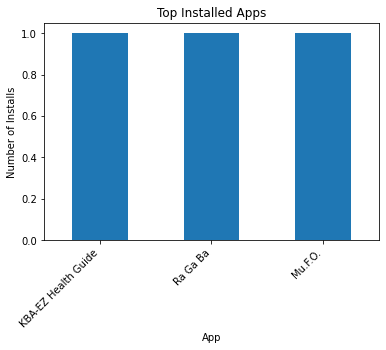

In [4]:
import matplotlib.pyplot as plt

#how it works is i think it goes and finds minimum/maximum number of installs
#but then theres more than one app possibly with the same number 5 apps with maximum number of installs etc..

minInstalledApp=df[df['Installs']==df['Installs'].min()]

print(minInstalledApp.head())


#HERE we check how many of the apps has max/min installs 
if len(minInstalledApp) == 1:
    app_name = minInstalledApp.iloc[0]['App']
    installs = minInstalledApp.iloc[0]['Installs']
    print(f"The app with the most installs is {app_name} with {installs} installs.")
else:
    print('multiple:'+str(len(minInstalledApp)))

    
# Assuming 'App' is the name of the column containing the app names
minInstalledApp.plot(kind='bar', x='App', y='Installs', legend=False)
plt.ylabel('Number of Installs')
plt.title('Top Installed Apps')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels to show them more clearly
plt.show()


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
                                                    App            Category  \
853                                     Toca Life: City           EDUCATION   
234       TurboScan: scan documents and receipts in PDF            BUSINESS   
235                      Tiny Scanner Pro: PDF Doc Scan            BUSINESS   
1327                                        Pocket Yoga  HEALTH_AND_FITNESS   
1001                                     Meme Generator       ENTERTAINMENT   
995   

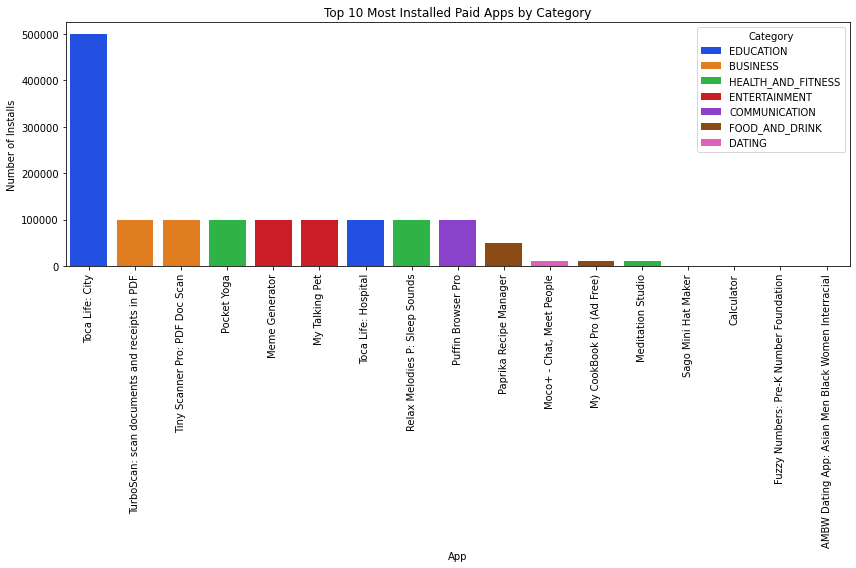

In [5]:
#FROM paid apps trying to find a correlation
#by category split which are the most installed paid apps top 20

!pip3 install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

top_paid_apps=df[df['Type']=='Paid']

top_paid_apps=top_paid_apps.head(20)

top_paid_apps = top_paid_apps.sort_values(by='Installs', ascending=False)

print(top_paid_apps[['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Price']])


# Plotting with seaborn

plt.figure(figsize=(12, 8))
sns.barplot(data=top_paid_apps, x='App', y='Installs', hue='Category', dodge=False, palette='bright')
plt.xlabel('App')  # Set the x-axis label
plt.ylabel('Number of Installs')  # Set the y-axis label
plt.title('Top 10 Most Installed Paid Apps by Category')  # Set the title
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them more clearly
plt.legend(title='Category')  # Add a legend to explain the colors
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

float64


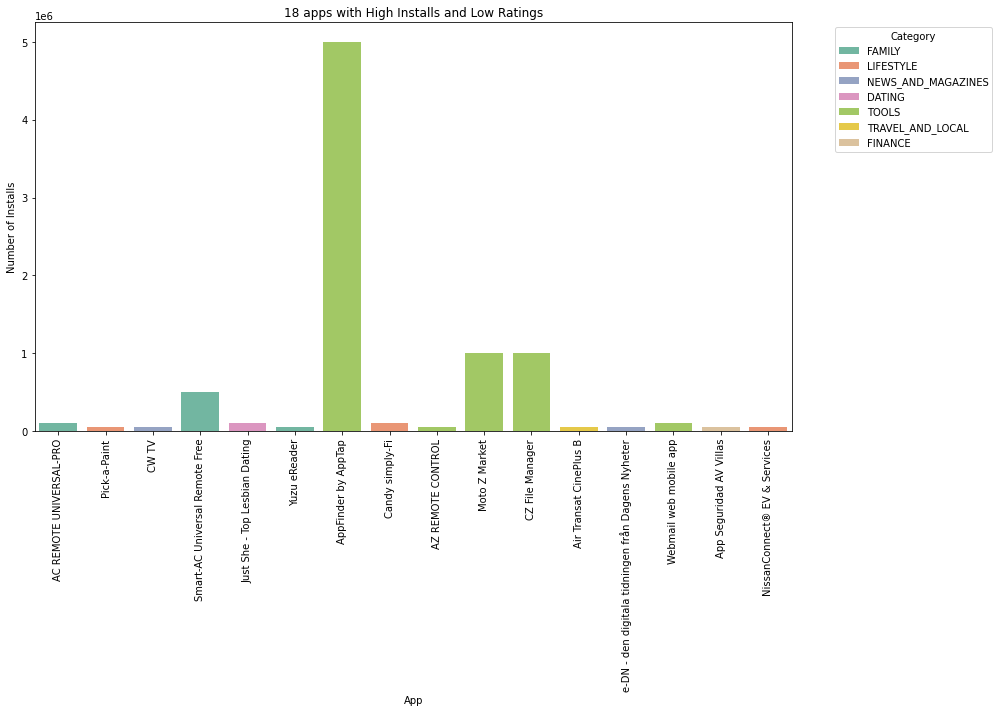

                      App  Installs  Rating Category  Reviews
5048  AppFinder by AppTap   5000000     2.0    TOOLS     2221


In [6]:
#If we do find the apps with the least ratings and most installs 
#we can think of it as a oppurtunity 
#demand is high(installs) but poor executed 
#market gap to fill or compete 

#checking the dtype has to be float or int
print(df['Rating'].dtype)

#sorted by ratings the lowest then amongst those with least ratings highest instalss ordered
oppurtunity=df.sort_values(by=['Rating','Installs'],ascending=[True,False])

#first 100 of the data
oppurtunity=oppurtunity.head(100)

#apps with higher installs than X from lowest rated apps list
installsAbove5000 = oppurtunity[oppurtunity['Installs'] > 49000]

#theres 18 apps above 50,000 instsalls with very low rratings
count=str(len(installsAbove5000))

# Plotting 
plt.figure(figsize=(14, 10))
sns.barplot(data=installsAbove5000, x='App', y='Installs', hue='Category', dodge=False, palette='Set2')
plt.xlabel('App')  # Set the x-axis label
plt.ylabel('Number of Installs')  # Set the y-axis label
plt.title(count + ' apps with High Installs and Low Ratings')  # Set the title
plt.xticks(rotation=90)  # Rotate the x-axis labels to show them more clearly
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place a legend outside the plot
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()


#FINDS

#Interesting App finder app by AppTap is 6million installs with ra

#Maximum installed app with lowest rating is AppTap by far with 6million installs rating 2.0,we are extracting this info below.
max_installs = installsAbove5000['Installs'].max()

apps_with_max_installs = installsAbove5000[installsAbove5000['Installs'] == max_installs]

print(apps_with_max_installs[['App', 'Installs','Rating','Category','Reviews']])


#USUALLY this app seems like an outlier we would have removed to understand our dataset better
#however in this particular situation we are looking for that outlier,it's sign of some app clearly off the charts compared to others.


#There's 2241 reviews on this particular app which is the source of understanding the reason behind bad ratings
#to essentially fix,improve and compete or make a new version.Or showcase this to develoeprs who would do it.


#Now I will load the customer review dataset to do sentimental anaylsis on that.




DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64
The app with the most negative reviews is: Angry Birds Classic with 147 negative reviews


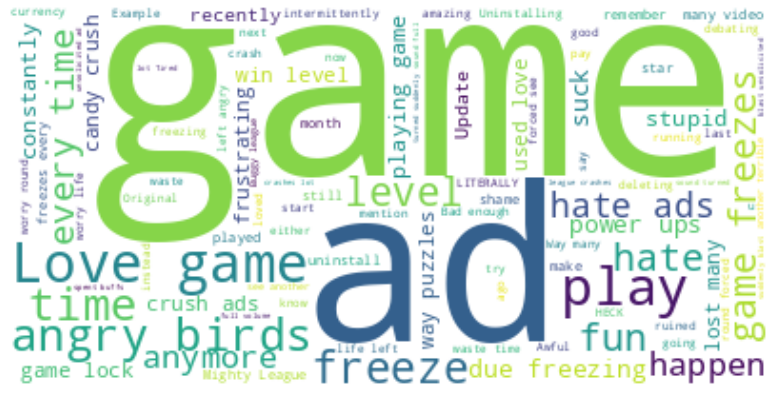

In [7]:
#Unfortunately,this reviews.csv does not include reviews for this app we are looking for

# scraped https://github.com/JoMingyu/google-play-scraper using this to get reviews 

#sentitement analysis which of these are negative for this app to understand things to imrpove.



#We find and analyse most negaitve review received app and visualize it instead of the above for now
!pip3 install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Load/clear drop nulls

sentiment_df = pd.read_csv('reviews.csv')
sentiment_df=sentiment_df.dropna()
print(sentiment_df.isnull().sum())


#WE WILL FIND THE APP WITH MOST NEGATIVE REVIEWS

# Filter out the negative reviews
negative_reviews = sentiment_df[sentiment_df['Sentiment'] == 'Negative']

# Count the number of negative reviews for each app
negative_review_counts = negative_reviews['App'].value_counts()


# gives you the name of the app with the most negative reviews.
app_with_most_negatives = negative_review_counts.idxmax()
#gives you the number of negative reviews that the app with the most negative reviews has received.
most_negative_count = negative_review_counts.max()
print(f"The app with the most negative reviews is: {app_with_most_negatives} with {most_negative_count} negative reviews")



# Now, filter the reviews for the app with the most negative reviews
app_reviews = negative_reviews[negative_reviews['App'] == app_with_most_negatives]



#PLOTT

# Generate a word cloud for negative reviews to find common pattern in negative reviews
negative_text = ' '.join(review for review in app_reviews['Translated_Review'].astype(str))
wordcloud = WordCloud(background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(20, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
#ml model use
'''
#deploy?
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Assuming your reviews are in a column called 'Translated_Review'
negative_reviews = negative_reviews['Translated_Review'].tolist()

# Run sentiment analysis in batches
results = sentiment_pipeline(negative_reviews)

# Add the results to your DataFrame
negative_reviews['Sentiment'] = [r['label'] for r in results]
negative_reviews['Sentiment_Score'] = [r['score'] for r in results]

# Now, reviews_df has two new columns with the sentiment label and score
print(negative_reviews.head())

'''

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Token indices sequence length is longer than the specified maximum sequence length for this model (640 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (640) must match the size of tensor b (512) at non-singleton dimension 1